In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
fig_size = (12, 4)
input_file = '~/Repositories/covid-19-data/public/data/owid-covid-data.csv'
n = 11
group_one = ['USA', 'IND']

In [3]:
inp = pd.read_csv(input_file)
inp['daily_tests'] = inp['new_tests'].rolling(7).mean()
inp['daily_cases'] = inp['new_cases'].rolling(7).mean()
inp['daily_deaths'] = inp['new_deaths'].rolling(7).mean()
inp['daily_deaths_change_1w'] = inp['daily_deaths'].pct_change(periods=6)*100
inp['daily_deaths_change_1m'] = inp['daily_deaths'].pct_change(periods=30)*100
inp['daily_cases_change_1w'] = inp['daily_cases'].pct_change(periods=6)*100
inp['daily_cases_change_1m'] = inp['daily_cases'].pct_change(periods=30)*100

inp['cfr'] = (100*inp['total_deaths'].rolling(7).sum()/inp['total_cases'].rolling(7).sum()).round(2)
inp['cfr_current'] = (100*inp['daily_deaths'].rolling(7).sum()/inp['daily_cases'].rolling(7).sum()).round(2)
inp['ptr'] = (100*inp['total_cases'].rolling(7).sum()/inp['total_tests'].rolling(7).sum()).round(2)
inp['ptr_current'] = (100*inp['daily_cases'].rolling(7).sum()/inp['daily_tests'].rolling(7).sum()).round(2)
inp['date'] = pd.to_datetime(inp['date'])
print(inp.columns)
inp[inp['iso_code'].isin(['OWID_WRL', 'USA', 'IND'])].groupby('iso_code').tail(1)[[
    'iso_code', 'date', 'total_cases', 'total_deaths', 'daily_cases', 'daily_deaths',
    'daily_deaths_change_1w', 'daily_deaths_change_1m', 'daily_cases_change_1w', 'daily_cases_change_1m',
    'cfr', 'cfr_current']]

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'total_vaccinations_per_hundred', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'ag

,iso_code,date,total_cases,total_deaths,daily_cases,daily_deaths,daily_deaths_change_1w,daily_deaths_change_1m,daily_cases_change_1w,daily_cases_change_1m,cfr,cfr_current
22978,IND,2020-12-24,10146845.0,147092.0,23914.000000,329.000000,-8.173844,-37.857528,-5.863101,-45.880010,1.45,1.41
53388,USA,2020-12-24,18650454.0,329023.0,205838.142857,2604.857143,0.963455,63.357821,-6.148951,17.388361,1.78,1.23
55260,OWID_WRL,2020-12-24,79368142.0,1742271.0,630425.857143,11436.285714,0.087518,12.699731,-2.110696,6.877486,2.20,1.80


In [4]:
top_n = inp.groupby('iso_code').tail(1).sort_values('total_cases', ascending=False).head(n)['iso_code'].tolist()
top_fifty = inp.groupby('iso_code').tail(1).sort_values('total_cases', ascending=False).head(50)['iso_code'].tolist()

In [5]:
df = inp[inp['iso_code'].isin(top_n)].groupby('iso_code').tail(1)[[
    'iso_code', 'population', 'total_cases', 'total_deaths', 'cfr', 'daily_cases_change_1w', 'daily_deaths_change_1w']]

df['cases_%_world'] = (df['total_cases']*100)/int(df[df['iso_code'] == 'OWID_WRL']['total_cases'])
df['deaths_%_world'] = (df['total_deaths']*100)/int(df[df['iso_code'] == 'OWID_WRL']['total_deaths'])
df['cases_1M_pop'] = ((df['total_cases']*1000000)/(df['population'])).astype(int)
df['deaths_1M_pop'] = ((df['total_deaths']*1000000)/(df['population'])).astype(int)

df.sort_values('cases_%_world', ascending=False).set_index('iso_code')

,population,total_cases,total_deaths,cfr,daily_cases_change_1w,daily_deaths_change_1w,cases_%_world,deaths_%_world,cases_1M_pop,deaths_1M_pop
iso_code,,,,,,,,,,
OWID_WRL,7.794799e+09,79368142.0,1742271.0,2.20,-2.110696,0.087518,100.000000,100.000000,10182,223
USA,3.310026e+08,18650454.0,329023.0,1.78,-6.148951,0.963455,23.498665,18.884720,56345,994
IND,1.380004e+09,10146845.0,147092.0,1.45,-5.863101,-8.173844,12.784531,8.442544,7352,106
BRA,2.125594e+08,7423945.0,189982.0,2.58,-4.052015,-1.112603,9.353810,10.904274,34926,893
RUS,1.459345e+08,2934695.0,52434.0,1.78,3.907119,1.736842,3.697573,3.009520,20109,359
FRA,6.527351e+07,2584333.0,62389.0,2.41,9.041644,-0.635990,3.256134,3.580901,39592,955
GBR,6.788600e+07,2195144.0,69732.0,3.27,43.009980,17.945341,2.765775,4.002362,32335,1027
TUR,8.433907e+07,2100712.0,19115.0,0.90,-27.994161,7.225964,2.646795,1.097131,24907,226
ITA,6.046183e+07,2009317.0,70900.0,3.53,-11.185885,-18.349235,2.531642,4.069401,33232,1172


<AxesSubplot:title={'center':'COVID changes from peak (top)'}, xlabel='iso_code'>

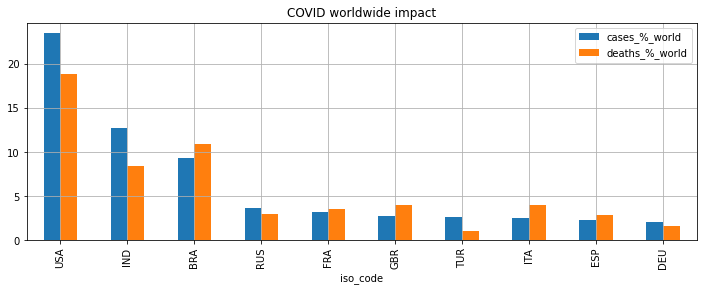

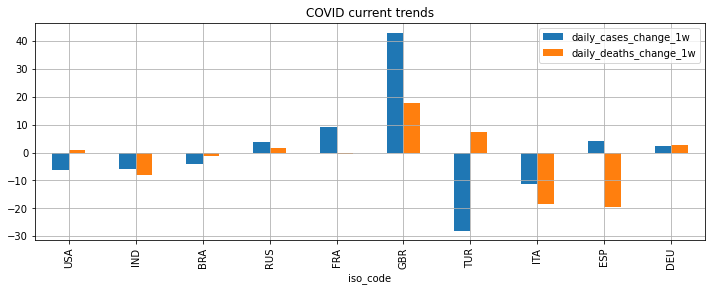

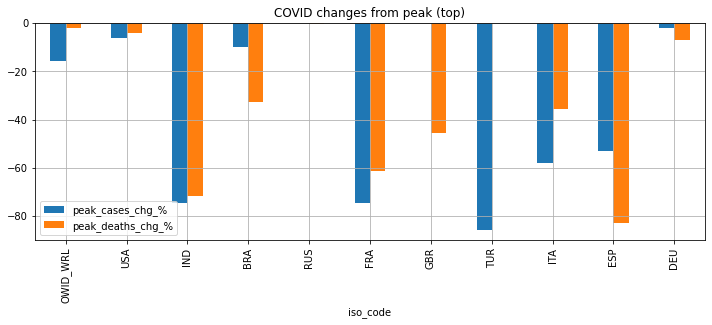

In [6]:
df[df['iso_code'] != 'OWID_WRL'].sort_values('cases_%_world', ascending=False).plot(
    x='iso_code', y=['cases_%_world', 'deaths_%_world'], kind='bar',
    figsize=fig_size, grid=True, title='COVID worldwide impact')

df[df['iso_code'] != 'OWID_WRL'].sort_values('cases_%_world', ascending=False).plot(
    x='iso_code', y=['daily_cases_change_1w', 'daily_deaths_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='COVID current trends')

df_max = inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code')[['daily_cases', 'daily_deaths']].max()
df_last = inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code')[['iso_code', 'daily_cases', 'daily_deaths']].tail(1).set_index('iso_code')
df_pct_chg_max = ((df_last-df_max)*100/df_max)
df_pct_chg_max['total_cases'] = inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code').tail(1).set_index('iso_code')['total_cases']
df_pct_chg_max = df_pct_chg_max.rename(columns={'daily_cases': 'peak_cases_chg_%','daily_deaths': 'peak_deaths_chg_%'})

df_pct_chg_max.sort_values(by='total_cases', ascending=False).head(n).plot(
    y=['peak_cases_chg_%', 'peak_deaths_chg_%'],
    kind='bar', figsize=fig_size, grid=True, title='COVID changes from peak (top)')

<AxesSubplot:title={'center':'COVID changes from peak (cases)'}, xlabel='iso_code'>

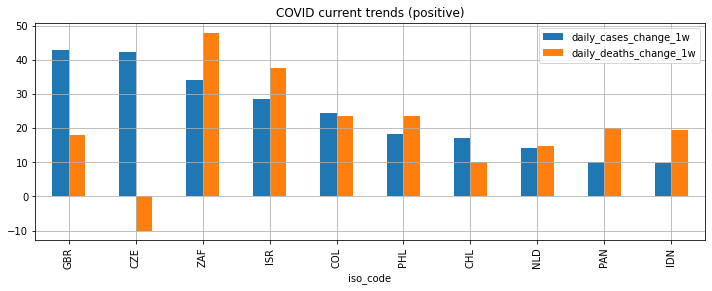

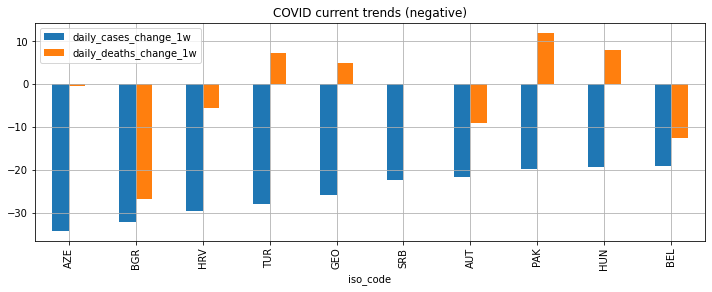

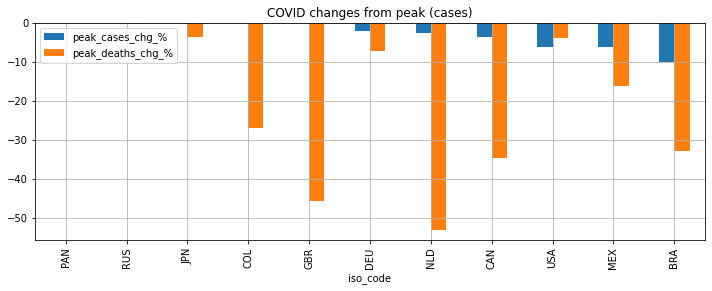

In [7]:
inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code').tail(1)[['iso_code',
                                                                  'daily_deaths_change_1w',
                                                                  'daily_cases_change_1w']].set_index('iso_code').sort_values(
    by='daily_cases_change_1w', ascending=False).head(10).plot(
    y=['daily_cases_change_1w', 'daily_deaths_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='COVID current trends (positive)')

inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code').tail(1)[['iso_code',
                                                                  'daily_deaths_change_1w',
                                                                  'daily_cases_change_1w']].set_index('iso_code').sort_values(
    by='daily_cases_change_1w', ascending=True).head(10).plot(
    y=['daily_cases_change_1w', 'daily_deaths_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='COVID current trends (negative)')

df_pct_chg_max.sort_values(by=['peak_cases_chg_%', 'peak_deaths_chg_%', 'total_cases'], ascending=[False, False, False]).head(n).plot(
    y=['peak_cases_chg_%', 'peak_deaths_chg_%'],
    kind='bar', figsize=fig_size, grid=True, title='COVID changes from peak (cases)')

In [8]:
def plot_weekly_avg(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')][[
        'date', 'daily_cases', 'daily_deaths', 'daily_tests']].plot(
        x='date', y=['daily_cases', 'daily_deaths'], secondary_y=['daily_deaths'],
        style = ['-', '--'], figsize=fig_size, grid=True, title=country)
    
def plot_cfr(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')].plot(
        x='date', y='cfr', style = ['--'], figsize=fig_size, grid=True, title=country)
    
def plot_ptr(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')].plot(
        x='date', y='ptr',
        style = ['--'], figsize=fig_size, grid=True, title=country)
    
def plot_totals(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')][[
        'date', 'total_cases', 'total_deaths']].plot(
        x='date', y=['total_cases', 'total_deaths'], secondary_y=['total_deaths'],
        style = ['-', '--'], figsize=fig_size, grid=True, title=country)

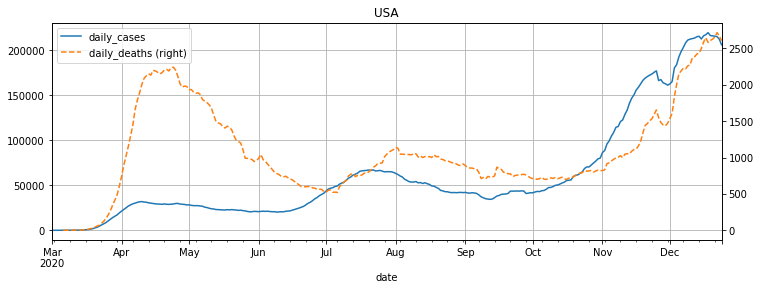

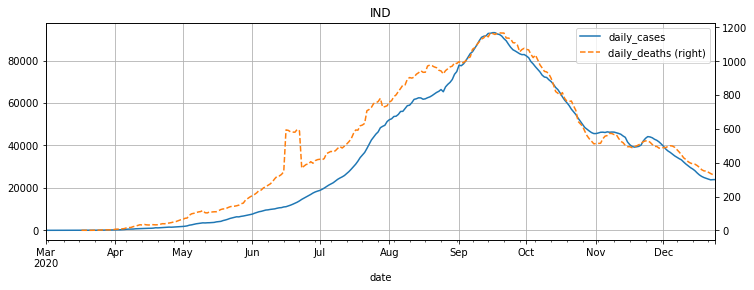

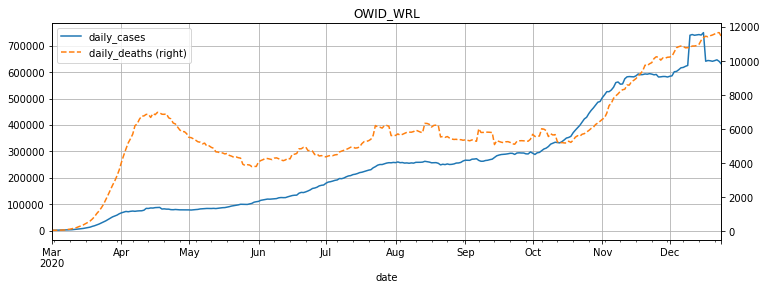

In [9]:
for country in group_one+['OWID_WRL']:
    plot_weekly_avg(inp, iso_code=country)

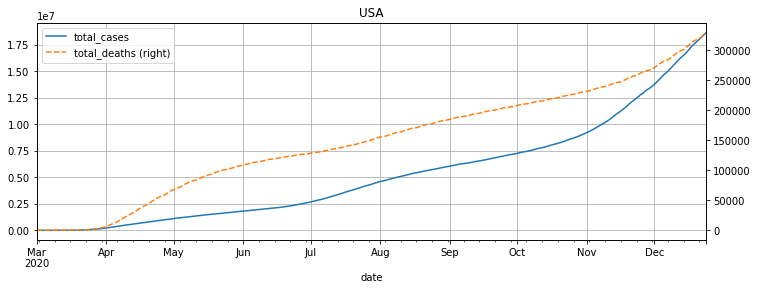

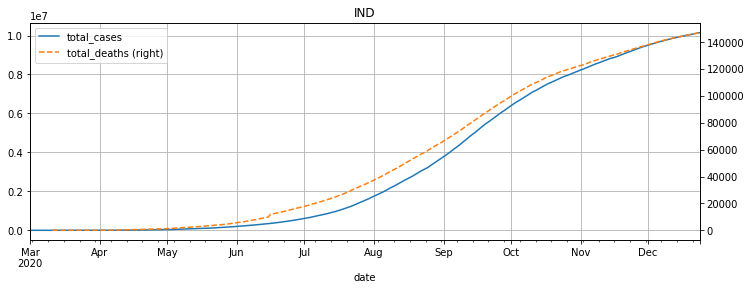

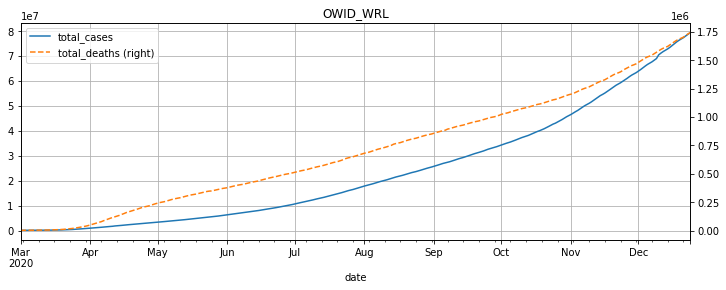

In [10]:
for country in group_one+['OWID_WRL']:
    plot_totals(inp, iso_code=country)

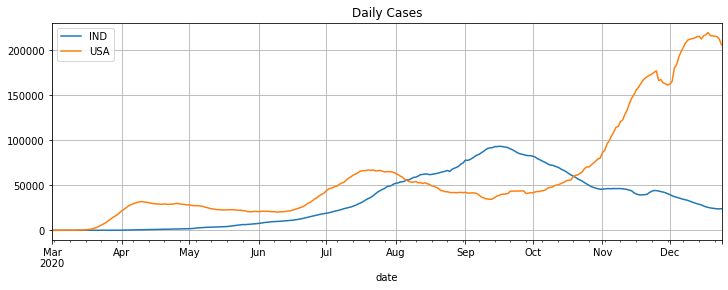

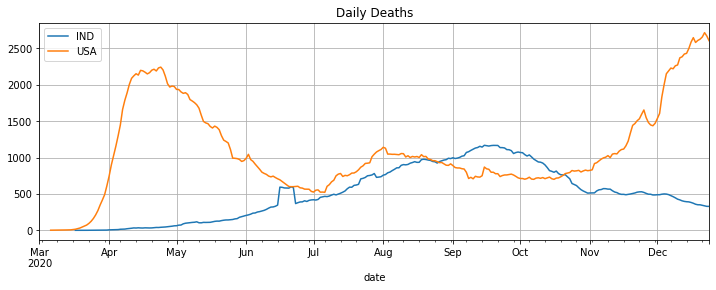

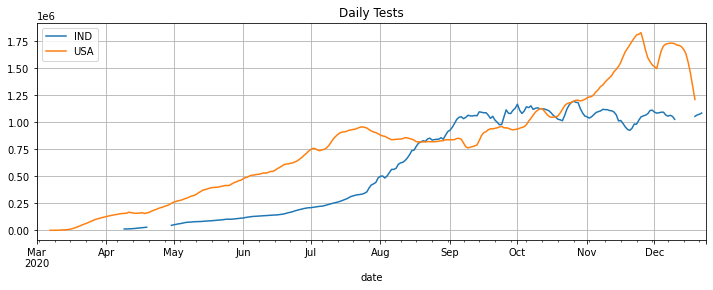

In [11]:
fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['daily_cases'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Cases')
axes.legend(['IND', 'USA'])

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['daily_deaths'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Deaths')
axes.legend(['IND', 'USA'])

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['daily_tests'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Tests')
axes.legend(['IND', 'USA'])

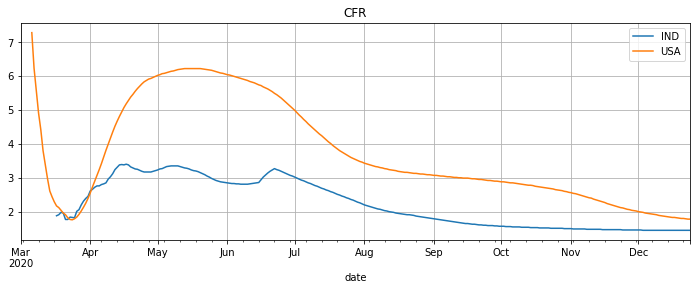

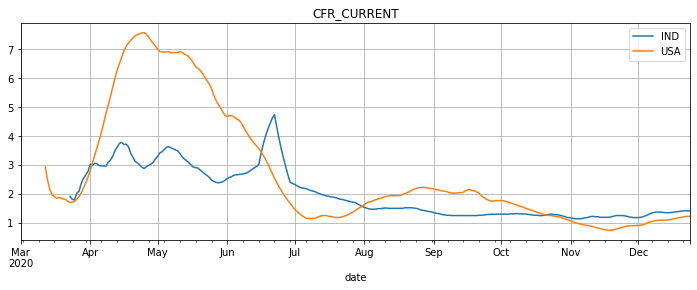

In [12]:
fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(['USA', 'IND'])) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['cfr'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='CFR')
axes.legend(['IND', 'USA'])

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(['USA', 'IND'])) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['cfr_current'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='CFR_CURRENT')
axes.legend(['IND', 'USA'])

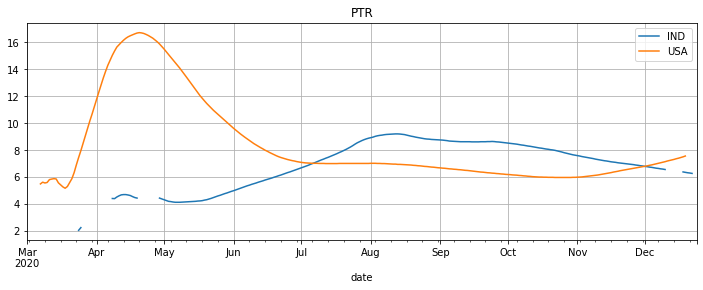

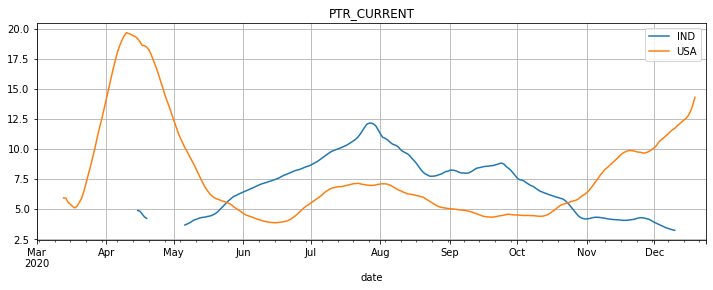

In [13]:
fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(['USA', 'IND'])) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['ptr'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='PTR')
axes.legend(['IND', 'USA'])

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(['USA', 'IND'])) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['ptr_current'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='PTR_CURRENT')
axes.legend(['IND', 'USA'])